# The Battle of the Neighborhoods
_Capstone Project for IBM Applied Data Science_

## Table of contents
- Introduction
- Data
- Methodology
- Analysis
- Results
- Discussion
- Conclusion

## Introduction
_Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem._

_where you discuss the business problem and who would be interested in this project._

---
Your moving to Buenos Aires
Compare the area surrounding your current address to the different neighborhoods of Buenos Aires Metropolitan area (City of BA and Greater BA) and classify them according to the top venues. Pick the top 5 lowest crime rate neighborhoods that are similar to your current address and predict housing rent based on housing requirements requirements.

### Import libraries

In [1]:
# General
import numpy as np # library for vector data handling
import pandas as pd # library for matrix data handling
from math import sin, cos, sqrt, atan2, radians

# Scraping
import requests # library to handle requests
from requests import get
from bs4 import BeautifulSoup # library for web scrapping  
from selenium import webdriver
from pandas.io.json import json_normalize # tranform json file into a pandas dataframe
# import json # library to handle JSON files
# from time import sleep

# Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Geolocation
#!conda install -c conda-forge geocoder --yes
import geocoder
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# Charts and plotting
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # maps library

### Credentials

In [2]:
# Foursquare credentials
fs_cred = pd.read_csv('foursquare.csv')
CLIENT_ID = fs_cred['CLIENT_ID'][0]
CLIENT_SECRET = fs_cred['CLIENT_SECRET'][0]
# OAUTH_TOKEN = fs_cred['OAUTH_TOKEN'][0]
VERSION = '20180604'

print('Foursquare credentails saved')

Foursquare credentails saved


### General variables

In [3]:
chrome_path = 'C:\chromedriver_win32\chromedriver.exe'
geolocator = Nominatim(user_agent="geo_explorer")

In [4]:
#coordinates for maps
bcn_latitude = 41.3973139
bcn_longitude = 2.1616566
bcn_zoom = 13
amba_latitude = -34.6336814
amba_longitude = -58.601898
amba_zoom = 10.50

In [5]:
# Values to restrict distance from a point in Buenos Aires
# Coordinates of the Science Ministry building
science_latitude = -34.582590
science_longitude = -58.428773
GBA_radius = 20

# approximate radius of earth in km
earth_radius = 6373.0

In [6]:
# Datasets sources
url_bcn_pop = 'https://www.bcn.cat/estadistica/castella/dades/anuari/cap01/C0101050.htm'
url_arg_coor = 'https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.5/download/localidades.json'
url_arg_pop = 'https://sig.indec.gob.ar/censo2010/?_ga=2.139240499.142017136.1591731561-616979075.1591488192'
url_arg_crime = 'https://estadisticascriminales.minseg.gob.ar/datos/snic-departamentos.csv'

Origin Address

In [7]:
origin_address = 'Carrer de Casanova, 85, Barcelona, España'

## Data
Datasources to be explored in the project

### Geolocation and population density
Gather geolocation data:
- Borough
- Neighborhood
- Population density
- Coordinates

#### Barcelona
For this city I will extract boroguh, neighborhood and pop density from the townhall website through Selenium scraping, and then add coordinates with geocoder

In [8]:
driver = webdriver.Chrome(chrome_path)
driver.get(url_bcn_pop)
bcn_pop = pd.read_html(driver.page_source)[1]
driver.close()
bcn_pop

,0,1,2,3,4,5,6,7
0,1. Territorio,1. Territorio,1. Territorio,1. Territorio,1. Territorio,1. Territorio,1. Territorio,1. Territorio
1,"document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images..."
2,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...,1.5. Superficie y densidad de los distritos y ...
3,"document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images..."
4,Distritos / Barrios,Distritos / Barrios,Distritos / Barrios,Población 1 enero 2018 (1),Superficie (ha) (2),Superficie residencial (ha) (2),Densidad (hab/ha),Densidad neta (hab/ha)
...,...,...,...,...,...,...,...,...
94,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...,Nota: densidad neta: población/superficie resi...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...,Departament d'Estadística i Difusió de Dades. ...
97,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....,Fuente: (1) Instituto Nacional de Estadística....


##### Cleansing
As seen above, the Barcelona dataset table acquired through Selenium has several row at the top and bottom that must be erased.
The first column is repeated 3 times, and it comprises borough and neighborhood in the same column considering borough as a grouping row. These rows should be erased and the borough separated into a new column.

In [9]:
bcn_pop.drop([1,2], axis=1, inplace=True)
new_header = bcn_pop.iloc[4] 
new_header.name = ''
bcn_pop.drop(bcn_pop.index[[0,1,2,3,4,5,6,7,8]], inplace=True)
bcn_pop.drop(bcn_pop.index[[-1,-2,-3,-4,-5,-6,-7]], inplace=True)
bcn_pop = bcn_pop.reset_index(drop=True)
bcn_pop.columns = new_header

In [10]:
bcn_temp = bcn_pop['Distritos / Barrios'].str.split('. ', n = 1, expand = True)
bcn_temp['Borough'] = ''
bcn_temp['Neighborhood'] = ''

boroughs = 0
neighborhoods = 0
for index, row in bcn_temp.iterrows():
    if index == 0:
        current_borough = row[1]
        boroughs = 1
        bcn_temp.at[index, 'Borough'] = 'ERASE'
    elif int(row[0]) == (neighborhoods + 1):
        neighborhoods += 1
        bcn_temp.at[index, 'Borough'] = current_borough
        bcn_temp.at[index, 'Neighborhood'] = row[1]
    elif int(row[0]) == (boroughs + 1):
        current_borough = row[1]
        boroughs += 1
        bcn_temp.at[index, 'Borough'] = 'ERASE'
    else:
        print("error at:", index)

In [11]:
bcn_pop.insert(0, 'Borough', bcn_temp['Borough'])
bcn_pop.insert(1, 'Neighborhood', bcn_temp['Neighborhood'])
bcn_pop.insert(2, 'Place', bcn_temp['Borough'] + "|" + bcn_temp['Neighborhood'])
bcn_pop.drop(['Distritos / Barrios', 'Población 1 enero 2018 (1)', 'Superficie (ha) (2)', 'Superficie residencial (ha) (2)', 'Densidad neta (hab/ha)'],
             axis=1, inplace=True)
bcn_pop = bcn_pop[bcn_pop['Borough'] != 'ERASE'].reset_index(drop=True)
bcn_pop

,Borough,Neighborhood,Place,Densidad (hab/ha)
0,Ciutat Vella,el Raval,Ciutat Vella|el Raval,427
1,Ciutat Vella,el Barri Gòtic,Ciutat Vella|el Barri Gòtic,205
2,Ciutat Vella,la Barceloneta,Ciutat Vella|la Barceloneta,136
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Ciutat Vella|Sant Pere, Santa Caterina i la Ri...",201
4,Eixample,el Fort Pienc,Eixample|el Fort Pienc,343
...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí|Diagonal Mar i el Front Marítim del...,113
69,Sant Martí,el Besòs i el Maresme,Sant Martí|el Besòs i el Maresme,199
70,Sant Martí,Provençals del Poblenou,Sant Martí|Provençals del Poblenou,189
71,Sant Martí,Sant Martí de Provençals,Sant Martí|Sant Martí de Provençals,354


Changing population density from hectare to square km

In [12]:
bcn_pop['Densidad (hab/ha)'] = bcn_pop['Densidad (hab/ha)'].astype(int) * 100
bcn_pop.rename(columns={'Densidad (hab/ha)':'Population density (p/km2)'}, inplace=True)
bcn_pop

,Borough,Neighborhood,Place,Population density (p/km2)
0,Ciutat Vella,el Raval,Ciutat Vella|el Raval,42700
1,Ciutat Vella,el Barri Gòtic,Ciutat Vella|el Barri Gòtic,20500
2,Ciutat Vella,la Barceloneta,Ciutat Vella|la Barceloneta,13600
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Ciutat Vella|Sant Pere, Santa Caterina i la Ri...",20100
4,Eixample,el Fort Pienc,Eixample|el Fort Pienc,34300
...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí|Diagonal Mar i el Front Marítim del...,11300
69,Sant Martí,el Besòs i el Maresme,Sant Martí|el Besòs i el Maresme,19900
70,Sant Martí,Provençals del Poblenou,Sant Martí|Provençals del Poblenou,18900
71,Sant Martí,Sant Martí de Provençals,Sant Martí|Sant Martí de Provençals,35400


Adding coordinates

In [14]:
latitude = []
longitude = []

for neighborhood, borough in zip(bcn_pop['Neighborhood'], bcn_pop['Borough']):
    location = geolocator.geocode('{}, {}, Barcelona, España'.format(neighborhood, borough))
    if location == None:
        location = geolocator.geocode('{}, Barcelona, España'.format(borough))
        if location == None:
            latitude.append(None)
            longitude.append(None)
        else:
            latitude.append(location.latitude)
            longitude.append(location.longitude)
    else:
        latitude.append(location.latitude)
        longitude.append(location.longitude)

bcn_pop["Latitude"] = latitude
bcn_pop["Longitude"] = longitude
bcn_pop

,Borough,Neighborhood,Place,Population density (p/km2),Latitude,Longitude
0,Ciutat Vella,el Raval,Ciutat Vella|el Raval,42700,41.379518,2.168368
1,Ciutat Vella,el Barri Gòtic,Ciutat Vella|el Barri Gòtic,20500,41.383395,2.176912
2,Ciutat Vella,la Barceloneta,Ciutat Vella|la Barceloneta,13600,41.380653,2.189927
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Ciutat Vella|Sant Pere, Santa Caterina i la Ri...",20100,41.374962,2.173269
4,Eixample,el Fort Pienc,Eixample|el Fort Pienc,34300,41.395925,2.182325
...,...,...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí|Diagonal Mar i el Front Marítim del...,11300,41.403173,2.213380
69,Sant Martí,el Besòs i el Maresme,Sant Martí|el Besòs i el Maresme,19900,41.414979,2.213877
70,Sant Martí,Provençals del Poblenou,Sant Martí|Provençals del Poblenou,18900,41.412360,2.204885
71,Sant Martí,Sant Martí de Provençals,Sant Martí|Sant Martí de Provençals,35400,41.416519,2.198968


### Argentina
First, get province, borough, neighborhoods and its coordinates

In [15]:
driver = webdriver.Chrome(chrome_path)
results = requests.get(url_arg_coor).json()['localidades']
driver.close()
arg_coor = pd.json_normalize(results)

# without droping ids
# arg_coor.drop(['categoria', 'fuente', 'municipio.nombre', 'municipio.id', 'localidad_censal.nombre', 'localidad_censal.id'], axis=1, inplace=True)
# arg_coor.rename(columns={'nombre':'Neighborhood', 'id':'Neighborhood_id', 'departamento.nombre':'Borough', 'departamento.id':'Borough_id', 'provincia.nombre':'Province', 'provincia.id':'Province_id', 'centroide.lat': 'Latitude', 'centroide.lon': 'Longitude'}, inplace=True)
# arg_coor = arg_coor[['Province', 'Province_id', 'Borough', 'Borough_id', 'Neighborhood', 'Neighborhood_id', 'Latitude', 'Longitude']]

# droping ids
arg_coor.drop(['categoria', 'fuente', 'municipio.nombre', 'municipio.id', 'localidad_censal.nombre', 'localidad_censal.id', 'id', 'departamento.id', 'provincia.id'], axis=1, inplace=True)
arg_coor.rename(columns={'nombre':'Neighborhood', 'departamento.nombre':'Borough', 'provincia.nombre':'Province', 'centroide.lat': 'Latitude', 'centroide.lon': 'Longitude'}, inplace=True)
arg_coor = arg_coor[['Province', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

# remove special characters for normalizing
arg_coor['Province'] = arg_coor['Province'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()
arg_coor['Borough'] = arg_coor['Borough'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()
arg_coor['Neighborhood'] = arg_coor['Neighborhood'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()

arg_coor = arg_coor[arg_coor['Neighborhood'] != 'Ciudad de buenos aires']

arg_coor
# arg_coor.to_excel("arg_coor.xlsx")  

,Province,Borough,Neighborhood,Latitude,Longitude
0,Buenos aires,Alberti,Alberti,-35.033073,-60.280620
1,Buenos aires,Alberti,Coronel segui,-34.868119,-60.393971
2,Buenos aires,Alberti,Mechita,-35.068014,-60.402597
3,Buenos aires,Alberti,Pla,-35.124382,-60.220061
4,Buenos aires,Alberti,Villa grisolia,-35.109618,-60.070551
...,...,...,...,...,...
4137,Buenos aires,General rodriguez,Barrio ruta 24 kilometro 10,-34.688216,-58.957430
4138,"Tierra del fuego, antartida e islas del atlant...",Rio grande,Rio grande,-53.787047,-67.713235
4139,"Tierra del fuego, antartida e islas del atlant...",Rio grande,Tolhuin,-54.511387,-67.195804
4140,"Tierra del fuego, antartida e islas del atlant...",Ushuaia,Laguna escondida,-54.637686,-67.766941


Population density
Best granularity available is by borough, but it can be uased as an estimate for each neighborhood inside each borough

In [16]:
driver = webdriver.Chrome(chrome_path)

In [17]:
driver.get(url_arg_pop)

In [18]:
driver.find_element_by_xpath('//*[@id="contenedor"]/div[2]/div[1]/form/table/tbody/tr/td[2]/select/option[2]').click()
driver.find_element_by_xpath('//*[@id="contenedor"]/div[2]/div[1]/form/table/tbody/tr/td[3]/input').click()

In [19]:
arg_pop = pd.read_html(driver.page_source, decimal=',', thousands='.')[6]
driver.close()
arg_pop.drop(arg_pop.index[-1], inplace=True)
arg_pop

,"Departamento, partido o comuna",Densidad de poblaciónhab/km²,Población total
0,"Comuna 3, Ciudad Autónoma de Buenos Aires",29302.7,187537.0
1,"Comuna 5, Ciudad Autónoma de Buenos Aires",26717.2,179005.0
2,"Comuna 6, Ciudad Autónoma de Buenos Aires",25518.3,176076.0
3,"Comuna 2, Ciudad Autónoma de Buenos Aires",25068.6,157932.0
4,"Comuna 7, Ciudad Autónoma de Buenos Aires",17789.6,220591.0
...,...,...,...
522,"Limay Mahuida, La Pampa",0.1,503.0
523,"Curacó, La Pampa",0.1,1040.0
524,"Antártida Argentina, Tierra del Fuego, Antárti...",--,190.0
525,"Lihuel Calel, La Pampa",--,439.0


##### Cleansing
The las row contains NaN data and must be erased
First column comprises borough and neighborhood as a comma separeted value and should be separated into 2 different columns.

In [20]:
arg_pop.dropna(how='all', inplace=True)
arg_temp = arg_pop['Departamento, partido o comuna'].str.split(', ', n = 1, expand = True)
arg_pop.insert(1, 'Borough', arg_temp[0])
arg_pop.insert(1, 'Province', arg_temp[1])

arg_pop.loc[arg_pop['Densidad de poblaciónhab/km²'] == '--', 'Densidad de poblaciónhab/km²'] = 0
arg_pop['Densidad de poblaciónhab/km²'] = arg_pop['Densidad de poblaciónhab/km²'].astype(float)
arg_pop['Area (km2)'] = arg_pop['Población total'] / arg_pop['Densidad de poblaciónhab/km²']

arg_pop.drop(['Departamento, partido o comuna', 'Población total'], axis=1, inplace=True)
arg_pop.rename(columns={'Densidad de poblaciónhab/km²':'Population density (p/km2)'}, inplace=True)

# remove special characters for normalizing
arg_pop['Province'] = arg_pop['Province'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()
arg_pop['Borough'] = arg_pop['Borough'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()

# Some minor changes for joining succesfuly with arg_coor
arg_pop.loc[(arg_pop['Province'] == 'Buenos aires') & (arg_pop['Borough'] == 'General san martin'), 'Borough'] = 'Ciudad libertador san martin'
arg_pop.loc[(arg_pop['Province'] == 'Buenos aires') & (arg_pop['Borough'] == 'Ezeiza'), 'Borough'] = 'Jose m. ezeiza'
arg_pop.loc[(arg_pop['Province'] == 'Tucuman') & (arg_pop['Borough'] == 'Juan b. alberdi'), 'Borough'] = 'Juan bautista alberdi'
arg_pop.loc[(arg_pop['Province'] == 'Santa fe') & (arg_pop['Borough'] == 'Constitucion'), 'Borough'] = 'Villa constitucion'
arg_pop.loc[(arg_pop['Province'] == 'San luis') & (arg_pop['Borough'] == 'La capital'), 'Borough'] = 'Juan martin de pueyrredon'
arg_pop.loc[(arg_pop['Province'] == 'Chaco') & (arg_pop['Borough'] == '1o de mayo'), 'Borough'] = '1 de mayo'

arg_pop

,Province,Borough,Population density (p/km2),Area (km2)
0,Ciudad autonoma de buenos aires,Comuna 3,29302.7,6.399990e+00
1,Ciudad autonoma de buenos aires,Comuna 5,26717.2,6.699991e+00
2,Ciudad autonoma de buenos aires,Comuna 6,25518.3,6.899989e+00
3,Ciudad autonoma de buenos aires,Comuna 2,25068.6,6.299993e+00
4,Ciudad autonoma de buenos aires,Comuna 7,17789.6,1.240000e+01
...,...,...,...,...
522,La pampa,Limay mahuida,0.1,5.030000e+03
523,La pampa,Curaco,0.1,1.040000e+04
524,"Tierra del fuego, antartida e islas del atlant...",Antartida argentina,0.0,inf
525,La pampa,Lihuel calel,0.0,inf


### Crime data

In [21]:
try:
    # read file into a dataframe
    arg_crime = pd.read_csv('crime_data_file.csv')
except:
    # get file from source
    !wget --no-check-certificate -O crime_data_file.csv https://estadisticascriminales.minseg.gob.ar/datos/snic-departamentos.csv
    # read file into a dataframe
    arg_crime = pd.read_csv('crime_data_file.csv')

In [22]:
arg_crime.head()

,anio,provincia_id,provincia_nombre,dpto_id,dpto_nombre,codigo_delito_agrupado_nombre,cantidad_hechos,cantidad_victimas
0,2014,6,Buenos Aires,6854,25 de Mayo,Total de hechos delictivos,261.0,NaN
1,2014,6,Buenos Aires,6854,25 de Mayo,Total de víctimas de delitos contra las personas,NaN,3.0
2,2014,6,Buenos Aires,6854,25 de Mayo,Total de víctimas de homicidios dolosos,NaN,2.0
3,2014,6,Buenos Aires,6854,25 de Mayo,Total de víctimas de lesiones dolosas,NaN,0.0
4,2014,6,Buenos Aires,6854,25 de Mayo,Total de víctimas de muertes en siniestros viales,NaN,1.0


In [23]:
arg_crime = arg_crime[arg_crime.codigo_delito_agrupado_nombre == 'Total de hechos delictivos']
arg_crime = arg_crime[arg_crime.anio == arg_crime['anio'].max()].reset_index(drop=True)

# without droping ids
# arg_crime.drop(['anio', 'codigo_delito_agrupado_nombre', 'cantidad_victimas'], axis=1, inplace=True)
# arg_crime.rename(columns={'provincia_nombre':'Province', 'provincia_id':'Province_id', 'dpto_nombre':'Borough', 'dpto_id':'Borough_id', 'cantidad_hechos': 'Crimes'}, inplace=True)

# droping ids
arg_crime.drop(['anio', 'codigo_delito_agrupado_nombre', 'cantidad_victimas', 'provincia_id', 'dpto_id'], axis=1, inplace=True)
arg_crime.rename(columns={'provincia_nombre':'Province', 'dpto_nombre':'Borough', 'cantidad_hechos': 'Crimes'}, inplace=True)

CABA_crime = pd.DataFrame(data={'Province': ['Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
              'Borough': ['Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15'],
             'Crimes': [3771, 1259, 2399, 3258, 1337, 1339, 2108, 2194, 1708, 1386, 1557, 1683, 1668, 1956, 1628]})
arg_crime = arg_crime.append(CABA_crime, ignore_index=True, sort=False)

# remove special characters for normalizing
arg_crime['Province'] = arg_crime['Province'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()
arg_crime['Borough'] = arg_crime['Borough'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.capitalize()

arg_crime.loc[(arg_crime['Province'] == 'Buenos aires') & (arg_crime['Borough'] == 'Ezeiza'), 'Borough'] = 'Jose m. ezeiza'
arg_crime.loc[(arg_crime['Province'] == 'Buenos aires') & (arg_crime['Borough'] == 'General san martin'), 'Borough'] = 'Ciudad libertador san martin'
arg_crime.loc[(arg_crime['Province'] == 'Chaco') & (arg_crime['Borough'] == '1o de mayo'), 'Borough'] = '1 de mayo'
arg_crime.loc[(arg_crime['Province'] == 'Chaco') & (arg_crime['Borough'] == "O' higgins"), 'Borough'] = "O'higgins"
arg_crime.loc[(arg_crime['Province'] == 'Mendoza') & (arg_crime['Borough'] == 'Malargue '), 'Borough'] = 'Malargue'
arg_crime.loc[(arg_crime['Province'] == 'Misiones') & (arg_crime['Borough'] == 'Libertador grl. san martin'), 'Borough'] = 'Libertador general san martin'
arg_crime.loc[(arg_crime['Province'] == 'Salta') & (arg_crime['Borough'] == 'Grl. jose de san martin'), 'Borough'] = 'General jose de san martin'
arg_crime.loc[(arg_crime['Province'] == 'San luis') & (arg_crime['Borough'] == 'La capital'), 'Borough'] = 'Juan martin de pueyrredon'
arg_crime.loc[(arg_crime['Province'] == 'Santa fe') & (arg_crime['Borough'] == 'Constitucion'), 'Borough'] = 'Villa constitucion'
arg_crime.loc[(arg_crime['Province'] == 'Tierra del fuego'), 'Province'] = 'Tierra del fuego, antartida e islas del atlantico sur'

arg_crime

,Province,Borough,Crimes
0,Buenos aires,25 de mayo,265.0
1,Buenos aires,9 de julio,1028.0
2,Buenos aires,Adolfo alsina,199.0
3,Buenos aires,Adolfo gonzales chaves,368.0
4,Buenos aires,Alberti,200.0
...,...,...,...
503,Ciudad autonoma de buenos aires,Comuna 11,1557.0
504,Ciudad autonoma de buenos aires,Comuna 12,1683.0
505,Ciudad autonoma de buenos aires,Comuna 13,1668.0
506,Ciudad autonoma de buenos aires,Comuna 14,1956.0


### Merging

In [24]:
arg_df = pd.merge(arg_coor, arg_crime, on=['Province','Borough'], how='outer')
arg_df = pd.merge(arg_df, arg_pop, on=['Province','Borough'], how='outer')
arg_df.insert(3, 'Place', arg_df['Borough'] + "|" + arg_df['Neighborhood'])
arg_df['Crimes (c/km2)'] = arg_df['Crimes'] / arg_df['Area (km2)']
arg_df.drop(['Crimes', 'Area (km2)'], axis=1, inplace=True)
arg_df

,Province,Borough,Neighborhood,Place,Latitude,Longitude,Population density (p/km2),Crimes (c/km2)
0,Buenos aires,Alberti,Alberti,Alberti|Alberti,-35.033073,-60.280620,9.4,0.17646
1,Buenos aires,Alberti,Coronel segui,Alberti|Coronel segui,-34.868119,-60.393971,9.4,0.17646
2,Buenos aires,Alberti,Mechita,Alberti|Mechita,-35.068014,-60.402597,9.4,0.17646
3,Buenos aires,Alberti,Pla,Alberti|Pla,-35.124382,-60.220061,9.4,0.17646
4,Buenos aires,Alberti,Villa grisolia,Alberti|Villa grisolia,-35.109618,-60.070551,9.4,0.17646
...,...,...,...,...,...,...,...,...
4143,La pampa,Norte (general pico),NaN,NaN,NaN,NaN,NaN,NaN
4144,La pampa,Oeste (25 de mayo),NaN,NaN,NaN,NaN,NaN,NaN
4145,La pampa,Sur (general acha),NaN,NaN,NaN,NaN,NaN,NaN
4146,"Tierra del fuego, antartida e islas del atlant...",Antartida argentina,NaN,NaN,NaN,NaN,0.0,NaN


### Data Filter
As the objective of this case study, we will make two subsets with relevant information:
1. Original address
1. Buenos Aires Metropolitan Area

https://es.wikipedia.org/wiki/Gran_Buenos_Aires

#### Barcelona

In [25]:
origin_address_location = geolocator.geocode(origin_address)
origin_address_latitude = origin_address_location.latitude
origin_address_longitude = origin_address_location.longitude

In [26]:
origin_data = []
min_distance = -1

for index, hood in bcn_pop.iterrows():    
    distance = sqrt((hood['Latitude'] - origin_address_latitude)**2 + (hood['Longitude'] - origin_address_longitude)**2)
    if min_distance == -1:
        min_distance = distance
        origin_data = [('Catalunya', hood['Borough'], hood['Neighborhood'], hood['Borough'] + "|" + hood['Neighborhood'], hood['Population density (p/km2)'], origin_address_latitude, origin_address_longitude)]
    elif distance < min_distance:
        min_distance = distance
        origin_data = [('Catalunya', hood['Borough'], hood['Neighborhood'], hood['Borough'] + "|" + hood['Neighborhood'], hood['Population density (p/km2)'], origin_address_latitude, origin_address_longitude)]
    
origin_df = pd.DataFrame(origin_data)
origin_df.columns = ['Province', 
              'Borough', 
              'Neighborhood', 
              'Place',
              'Population density (p/km2)', 
              'Latitude', 
              'Longitude']

origin_df

,Province,Borough,Neighborhood,Place,Population density (p/km2),Latitude,Longitude
0,Catalunya,Eixample,l'Antiga Esquerra de l'Eixample,Eixample|l'Antiga Esquerra de l'Eixample,34300,41.386864,2.156519


#### Argentina

In [27]:
AMBA = ['Ciudad autonoma de buenos aires', 'Almirante brown', 'Avellaneda', 'Berazategui', 'Esteban echeverria', 'Jose m. ezeiza', 'Florencio varela', 'Ciudad libertador san martin', 'Hurlingham', 'Ituzaingo', 'Jose c. paz', 'La matanza', 'Lanus', 'Lomas de zamora', 'Malvinas argentinas', 'Merlo', 'Moreno', 'Moron', 'Quilmes', 'San fernando', 'San isidro', 'San miguel', 'Tigre', 'Tres de febrero', 'Vicente lopez']

In [28]:
GBA_df = arg_df[arg_df['Province'] == 'Buenos aires']
GBA_df = GBA_df[GBA_df['Borough'].isin(AMBA)]
GBA_df.shape

(196, 8)

In [29]:
# Distance filter
def get_distance(latitude1, longitude1, latitude2, longitude2):
    lat1 = radians(latitude1)
    lon1 = radians(longitude1)
    lat2 = radians(latitude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = earth_radius * c

    return distance

In [30]:
inside = []
for hood in zip(GBA_df['Latitude'], GBA_df['Longitude']):
    distance = get_distance(science_latitude, science_longitude, hood[0], hood[1])
    if distance <= GBA_radius:
        inside.append(1)
    elif distance <= (GBA_radius + 5):
        inside.append(2)
    else:
        inside.append(0)
GBA_df['inside'] = inside
GBA2_df = GBA_df.copy()

In [31]:
GBA_df = GBA_df[GBA_df['inside'] == 1]
GBA_df.drop(['inside'], axis=1, inplace=True)
GBA_df.shape

(95, 8)

In [32]:
CABA_df = arg_df[arg_df['Province']=='Ciudad autonoma de buenos aires']
CABA_df.shape

(48, 8)

In [33]:
AMBA_df = GBA_df.append(CABA_df, ignore_index=True, sort=False)
AMBA_df

,Province,Borough,Neighborhood,Place,Latitude,Longitude,Population density (p/km2),Crimes (c/km2)
0,Buenos aires,Avellaneda,Area cinturon ecologico,Avellaneda|Area cinturon ecologico,-34.675006,-58.310563,6230.5,211.418490
1,Buenos aires,Avellaneda,Avellaneda,Avellaneda|Avellaneda,-34.662651,-58.365699,6230.5,211.418490
2,Buenos aires,Avellaneda,Crucesita,Avellaneda|Crucesita,-34.669106,-58.357454,6230.5,211.418490
3,Buenos aires,Avellaneda,Dock sud,Avellaneda|Dock sud,-34.649127,-58.341177,6230.5,211.418490
4,Buenos aires,Avellaneda,Gerli,Avellaneda|Gerli,-34.684764,-58.372603,6230.5,211.418490
...,...,...,...,...,...,...,...,...
138,Ciudad autonoma de buenos aires,Comuna 15,Chacarita,Comuna 15|Chacarita,-34.588373,-58.454175,12767.4,113.846042
139,Ciudad autonoma de buenos aires,Comuna 15,Parque chas,Comuna 15|Parque chas,-34.585522,-58.479123,12767.4,113.846042
140,Ciudad autonoma de buenos aires,Comuna 15,Paternal,Comuna 15|Paternal,-34.597422,-58.468665,12767.4,113.846042
141,Ciudad autonoma de buenos aires,Comuna 15,Villa crespo,Comuna 15|Villa crespo,-34.598834,-58.442722,12767.4,113.846042


In [34]:
AMBA2_df = CABA_df.copy()
AMBA2_df['inside'] = 1
AMBA2_df = AMBA2_df.append(GBA2_df, ignore_index=True, sort=False)

In [35]:
all_df = AMBA_df.copy()
all_df.drop(['Crimes (c/km2)'], axis=1, inplace=True)
all_df = all_df.append(origin_df)

# all_df['Place'] = all_df['Borough'] + "|" + all_df['Neighborhood']
all_df.drop(['Province', 'Borough', 'Neighborhood'], axis=1, inplace=True)
all_df.reset_index(drop=True, inplace=True)
# all_df = all_df[['Place', 'Population density (p/km2)', 'Latitude', 'Longitude']]
all_df

,Place,Latitude,Longitude,Population density (p/km2)
0,Avellaneda|Area cinturon ecologico,-34.675006,-58.310563,6230.5
1,Avellaneda|Avellaneda,-34.662651,-58.365699,6230.5
2,Avellaneda|Crucesita,-34.669106,-58.357454,6230.5
3,Avellaneda|Dock sud,-34.649127,-58.341177,6230.5
4,Avellaneda|Gerli,-34.684764,-58.372603,6230.5
...,...,...,...,...
139,Comuna 15|Parque chas,-34.585522,-58.479123,12767.4
140,Comuna 15|Paternal,-34.597422,-58.468665,12767.4
141,Comuna 15|Villa crespo,-34.598834,-58.442722,12767.4
142,Comuna 15|Villa ortuzar,-34.580974,-58.467652,12767.4


[Text(0.5, 0, '')]

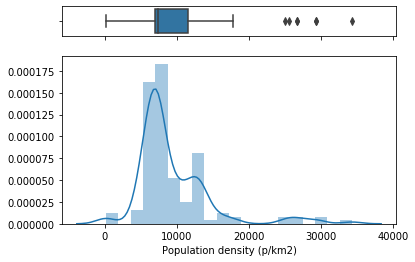

In [36]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x=all_df['Population density (p/km2)'], ax=ax_box)
sns.distplot(all_df['Population density (p/km2)'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

These are not outliers so they cannot be excluded, but they might end up ruining the kmeans

### Venues

In [37]:
radius = 2000
limit = 100

In [38]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
def getNearbyVenues(place, latitudes, longitudes, radius=radius, limit=limit):
    
    venues_list=[]
    for place, lat, lng in zip(place, latitudes, longitudes):
        print(place, end = '')
            
        # create the API request URL
#         url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&time=any&day=any'.format(
# No radius. Foursquare will suggest automatically
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&time=any&day=any'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
#             radius, 
            limit)
            
        groups = {}
        iteration = 0
        while not groups:
            # make the GET request
            iteration += 1
            if iteration > 10:
                print("*** No venues for", place,"***")
                break
            print(".", end = '')
            api_response = requests.get(url)
            try:
                groups = api_response.json()["response"]['groups']
            except:
                continue
        
        if not groups:
            continue
        
        results = groups[0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(place, 
                             lat, 
                             lng, 
                             v['venue']['name'], 
                             v['venue']['location']['lat'], 
                             v['venue']['location']['lng'], 
                             v['venue']['categories'][0]['name']) for v in results])
        print("OK")
            

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [40]:
all_venues = getNearbyVenues(place = all_df['Place'],
                             latitudes = all_df['Latitude'], 
                             longitudes = all_df['Longitude'])

Avellaneda|Area cinturon ecologico.OK
Avellaneda|Avellaneda.OK
Avellaneda|Crucesita.OK
Avellaneda|Dock sud.OK
Avellaneda|Gerli.OK
Avellaneda|Pineyro.OK
Avellaneda|Sarandi.OK
Avellaneda|Villa dominico.OK
Avellaneda|Wilde.OK
Ciudad libertador san martin|Barrio parque general san martin.OK
Ciudad libertador san martin|Billinghurst.OK
Ciudad libertador san martin|Ciudad del libertador general san martin.OK
Ciudad libertador san martin|Ciudad jardin el libertador.OK
Ciudad libertador san martin|Villa ayacucho.OK
Ciudad libertador san martin|Villa ballester.OK
Ciudad libertador san martin|Villa bernardo monteagudo.OK
Ciudad libertador san martin|Villa chacabuco.OK
Ciudad libertador san martin|Villa coronel jose m. zapiola.OK
Ciudad libertador san martin|Villa general antonio j. de sucre.OK
Ciudad libertador san martin|Villa general eugenio necochea.OK
Ciudad libertador san martin|Villa general jose tomas guido.OK
Ciudad libertador san martin|Villa general juan g. las heras.OK
Ciudad libertad

[Text(0.5, 0, '')]

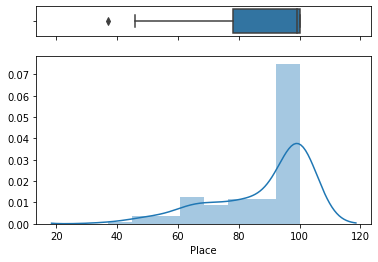

In [41]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x=all_venues['Place'].value_counts(), ax=ax_box)
sns.distplot(all_venues['Place'].value_counts(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

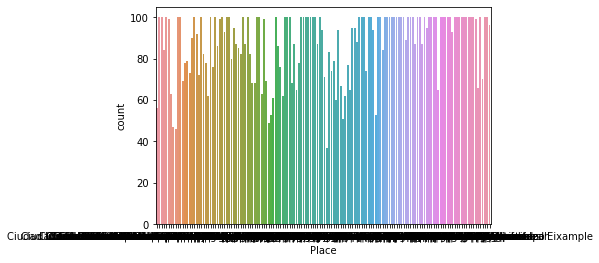

In [42]:
sns.countplot(x='Place', data=all_venues)

In [43]:
all_venues['Venue Category'].value_counts()

Ice Cream Shop                     975
Argentinian Restaurant             839
Pizza Place                        824
Café                               720
Bakery                             554
                                  ... 
Salon / Barbershop                   1
Buffet                               1
Government Building                  1
Molecular Gastronomy Restaurant      1
Auto Garage                          1
Name: Venue Category, Length: 289, dtype: int64

[Text(0.5, 0, '')]

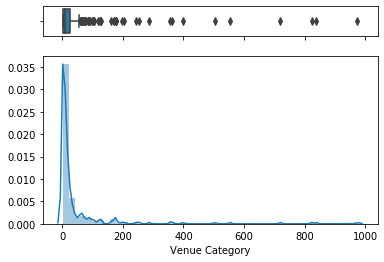

In [44]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x=all_venues['Venue Category'].value_counts(), ax=ax_box)
sns.distplot(all_venues['Venue Category'].value_counts(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [45]:
# plt.figure(figsize=(16, 6))
# sns.jointplot(y='Place', x='Venue Category', data=all_venues).set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')

### Housing data

In [46]:
house_types = ['departamentos', 'casas', 'ph']

def house_listing(hoods):
    listings = []
    for index, hood in hoods.iterrows():
        province = hood['Province']
        borough = hood['Borough']
        neighborhood = hood['Neighborhood']
        if province == 'Ciudad autonoma de buenos aires':
            zone = 'capital-federal'
        else:
            if borough in ['Ciudad libertador san martin', 'Jose c. paz', 'Malvinas argentinas', 'San fernando', 'San isidro', 'San miguel', 'Tigre', 'Vicente lopez']:
                zone = 'bsas-gba-norte'
            elif borough in ['Hurlingham', 'Ituzaingo', 'La matanza', 'Merlo', 'Moreno', 'Moron', 'Tres de febrero']:
                zone = 'bsas-gba-oeste'
            elif borough in ['Almirante brown', 'Avellaneda', 'Berazategui', 'Esteban echeverria', 'Jose m. ezeiza', 'Florencio varela', 'Lanus', 'Lomas de zamora', 'Quilmes']:
                zone = 'bsas-gba-sur'
            borough_ml = borough.replace('.','')
            borough_ml = borough_ml.replace(' ','-')
        
        
        for item in house_types:
            house_type = item
            listing_found = True
            list_ini = 1
            while listing_found:
                if zone == 'capital-federal':
                    url = 'https://inmuebles.mercadolibre.com.ar/{}/alquiler/{}/{}/_Desde_{}_NoIndex_True'.format(
                        house_type, 
                        zone, 
                        neighborhood, 
                        list_ini)
                else:
                    url = 'https://inmuebles.mercadolibre.com.ar/{}/alquiler/{}/{}/{}/_Desde_{}_NoIndex_True'.format(
                        house_type, 
                        zone, 
                        borough_ml, 
                        neighborhood, 
                        list_ini)

                response = get(url)
                soup = BeautifulSoup(response.text, 'html.parser')

                apartment_containers = soup.find_all('div', class_='item__info')
#                 apartment_containers = soup.find_all('li', class_='results-item highlighted article grid ')

                # check if page contains listings
                if len(apartment_containers) == 0:
                    break

                # for each apartment extract relevant data
                for apt in apartment_containers:
                    try:
                        moneda = apt.find('span', class_="price__symbol").text
                    except:
                        moneda = None

                    try:
                        precio = int(apt.find('span', class_="price__fraction").text.replace('.',''))
                    except:
                        precio = np.nan

                    try:
                        datos = apt.find('div', class_="item__attrs").text.split('|')
                        superficie = int(datos[0].replace(' m² cubiertos ',''))
                        ambientes = int(datos[1].replace(' ambs. ',''))
                    except:
                        superficie = np.nan
                        ambientes = np.nan

                    try:
                        direccion = apt.find('div', class_="item__title").text
                    except:
                        direccion = None
                    
#                     try:
#                         apt_url = apt.find('a', href=True)['href']
#                     except:
#                         apt_url = None

                    listings.append([borough, neighborhood, house_type, superficie, ambientes, moneda, precio, direccion])
#                     listings.append([borough, neighborhood, house_type, superficie, ambientes, moneda, precio, direccion, apt_url])

                # increase page number
                list_ini += 48

            #     sleep(np.random.randint(1,3))
    columns = ['Borough', 'Neighborhood', 'House_type', 'Area', 'Rooms', 'Currency', 'Price', 'Address']
#     columns = ['Borough', 'Neighborhood', 'House_type', 'Area', 'Rooms', 'Currency', 'Price', 'Address', 'URL']
    listings_df = pd.DataFrame(listings, columns = columns)
    return listings_df

## Methodology

## Analysis

In [47]:
map_bcn = folium.Map(location=[bcn_latitude, bcn_longitude], zoom_start=bcn_zoom)

# add markers to map
for lat, lng, borough, neighborhood in zip(origin_df['Latitude'], origin_df['Longitude'], origin_df['Borough'], origin_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [origin_address_latitude, origin_address_longitude],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#67c92e',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)

for lat, lng, borough, neighborhood in zip(bcn_pop['Latitude'], bcn_pop['Longitude'], bcn_pop['Borough'], bcn_pop['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)
    
map_bcn

In [49]:
# create map
map_amba_filtered = folium.Map(location=[amba_latitude, amba_longitude], zoom_start=amba_zoom)

# add markers to the map
markers_colors = []
for lat, lon, poi, inside in zip(AMBA2_df['Latitude'], AMBA2_df['Longitude'], AMBA2_df['Place'], AMBA2_df['inside']):
    label = folium.Popup(str(poi) + str(inside), parse_html=True)
    if inside == 1:
        color='Green'
        fill_color='Green'
    elif inside == 2:
        color='Yellow'
        fill_color='Yellow'
    else:
        color='Gray'
        fill_color='Gray'
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_opacity=0.7,
        fill_color=fill_color).add_to(map_amba_filtered)

folium.CircleMarker(
    [science_latitude, science_longitude],
    radius=5,
    popup='science',
    color='Red',
    fill=True,
    fill_opacity=0.7,
    fill_color='Red').add_to(map_amba_filtered)

map_amba_filtered

In [48]:
map_amba = folium.Map(location=[amba_latitude, amba_longitude], zoom_start=amba_zoom)

# add markers to map
for lat, lng, borough, neighborhood in zip(AMBA_df['Latitude'], AMBA_df['Longitude'], AMBA_df['Borough'], AMBA_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amba)

map_amba

In [50]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add place column back to dataframe
all_onehot['Place'] = all_venues['Place']

# move place column to the first column
fixed_columns = ['Place'] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Place,Accessories Store,Adult Boutique,Airport,Airport Service,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,...,Veterinarian,Video Game Store,Vietnamese Restaurant,Watch Shop,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# all_grouped = all_onehot.groupby('Place').mean().reset_index()
all_grouped = all_onehot.groupby('Place').sum().reset_index()
all_grouped

,Place,Accessories Store,Adult Boutique,Airport,Airport Service,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,...,Veterinarian,Video Game Store,Vietnamese Restaurant,Watch Shop,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Avellaneda|Area cinturon ecologico,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,Avellaneda|Avellaneda,0,0,0,0,0,0,0,19,3,...,0,0,0,0,0,0,0,0,0,0
2,Avellaneda|Crucesita,0,0,0,0,0,0,0,21,2,...,0,0,0,0,0,0,0,0,0,0
3,Avellaneda|Dock sud,0,0,0,0,0,0,0,8,2,...,0,0,0,0,0,0,0,0,0,0
4,Avellaneda|Gerli,0,0,0,0,0,0,0,14,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Vicente lopez|Munro,1,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0
140,Vicente lopez|Olivos,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
141,Vicente lopez|Vicente lopez,0,0,0,0,2,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
142,Vicente lopez|Villa adelina,1,0,0,0,1,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
places_venues_sorted = pd.DataFrame(columns=columns)
places_venues_sorted['Place'] = all_grouped['Place']

for ind in np.arange(all_grouped.shape[0]):
    places_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

places_venues_sorted.head()

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Avellaneda|Area cinturon ecologico,Ice Cream Shop,Argentinian Restaurant,Pizza Place,Bakery,Sporting Goods Shop,Coffee Shop,Soccer Field,Soccer Stadium,Brewery
1,Avellaneda|Avellaneda,Argentinian Restaurant,Pizza Place,BBQ Joint,Café,Restaurant,Ice Cream Shop,Coffee Shop,Art Gallery,Soccer Stadium
2,Avellaneda|Crucesita,Argentinian Restaurant,Ice Cream Shop,Pizza Place,Café,BBQ Joint,Restaurant,Bakery,Clothing Store,Coffee Shop
3,Avellaneda|Dock sud,Argentinian Restaurant,Pizza Place,Ice Cream Shop,BBQ Joint,Café,Bakery,Plaza,Restaurant,Fish Market
4,Avellaneda|Gerli,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Café,Fast Food Restaurant,Bar,Coffee Shop,Restaurant,Soccer Stadium


In [54]:
all_grouped_clustering = all_grouped.merge(all_df, on='Place')
all_grouped_clustering.drop(['Place', 'Latitude', 'Longitude'], axis=1, inplace=True)

scaler = StandardScaler()
all_grouped_clustering = pd.DataFrame(scaler.fit_transform(all_grouped_clustering.values), columns=all_grouped_clustering.columns, index=all_grouped_clustering.index)

In [55]:
all_grouped_clustering

,Accessories Store,Adult Boutique,Airport,Airport Service,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Vietnamese Restaurant,Watch Shop,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Population density (p/km2)
0,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,-0.504310,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.605052
1,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,3.637552,5.419636,2.384619,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.605052
2,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,4.189800,3.520786,2.384619,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.605052
3,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,0.600187,3.520786,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.605052
4,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,2.256931,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,3.050851,-0.312348,-0.361787,-0.083624,-0.605052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.666314,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,-0.780434,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,2.243081,-0.083624,-0.477059
140,-0.215666,-0.083624,-0.145865,-0.189661,-0.698865,-0.083624,-0.145865,0.047938,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.477059
141,-0.215666,-0.083624,-0.145865,-0.189661,2.305212,-0.083624,6.855655,0.047938,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,-0.361787,-0.083624,-0.477059
142,3.666314,-0.083624,-0.145865,-0.189661,0.803173,-0.083624,-0.145865,-0.504310,-0.276916,-0.256805,...,-0.118678,-0.145865,-0.083624,-0.258199,-0.083624,-0.277350,-0.312348,2.243081,-0.083624,-0.477059


In [56]:
origin_place = str((origin_df['Borough'] + "|" + origin_df['Neighborhood'])[0])
origin_grouped_clustering = all_grouped_clustering.loc[all_grouped['Place'] == origin_place]
origin_grouped_clustering.reset_index(drop=True, inplace=True)
AMBA_grouped_clustering = all_grouped_clustering.loc[all_grouped['Place'] != origin_place]
AMBA_grouped_clustering.reset_index(drop=True, inplace=True)
AMBA_venues_sorted = places_venues_sorted.loc[all_grouped['Place'] != origin_place]
AMBA_venues_sorted.reset_index(drop=True, inplace=True)

In [57]:
wcss = []
min_k = 2
max_k = 50
for i in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500)
#     kmeans.fit(all_grouped_clustering)
    kmeans.fit(AMBA_grouped_clustering)
    wcss.append(kmeans.inertia_)

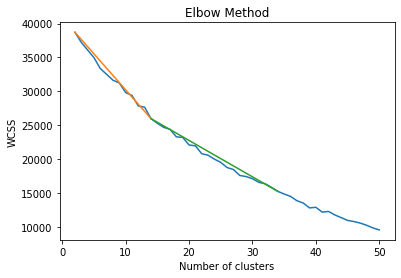

In [69]:
plt.plot(range(min_k, max_k + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
k_obj = 14
# k_obj2 = 22
a = min_k
b = k_obj
c = b
d = c + 20
# d = k_obj2
# e = d
# f = e + 20
x1, y1 = [a, b], [wcss[a - min_k], wcss[b - min_k]]
x2, y2 = [c, d], [wcss[c - min_k], wcss[d - min_k]]
# x3, y3 = [e, f], [wcss[e - min_k], wcss[f - min_k]]
# plt.plot(x1, y1, x2, y2, x3, y3)
plt.plot(x1, y1, x2, y2)
plt.show()

There is no clear elbow shape on the WCSS graph. 13 clusters seems to be the most cost efficient option for this model

In [70]:
selected_k = 14
kmeans = KMeans(n_clusters=selected_k, init='k-means++', n_init=15, max_iter=500)
# kmeans.fit(all_grouped_clustering)
kmeans.fit(AMBA_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=14, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
# add clustering labels
try:
    AMBA_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    AMBA_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
    AMBA_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#     No tengo muy claro para qué uso esto. Quedó de antes de los cambios
# add latitude/longitude for each neighborhood
AMBA_merged = AMBA_df.copy()
AMBA_merged = AMBA_merged.join(AMBA_venues_sorted.set_index('Place'), on='Place')

AMBA_merged.head()

C:\Users\leo_h\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Province,Borough,Neighborhood,Place,Latitude,Longitude,Population density (p/km2),Crimes (c/km2),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Buenos aires,Avellaneda,Area cinturon ecologico,Avellaneda|Area cinturon ecologico,-34.675006,-58.310563,6230.5,211.41849,11,Ice Cream Shop,Argentinian Restaurant,Pizza Place,Bakery,Sporting Goods Shop,Coffee Shop,Soccer Field,Soccer Stadium,Brewery
1,Buenos aires,Avellaneda,Avellaneda,Avellaneda|Avellaneda,-34.662651,-58.365699,6230.5,211.41849,7,Argentinian Restaurant,Pizza Place,BBQ Joint,Café,Restaurant,Ice Cream Shop,Coffee Shop,Art Gallery,Soccer Stadium
2,Buenos aires,Avellaneda,Crucesita,Avellaneda|Crucesita,-34.669106,-58.357454,6230.5,211.41849,7,Argentinian Restaurant,Ice Cream Shop,Pizza Place,Café,BBQ Joint,Restaurant,Bakery,Clothing Store,Coffee Shop
3,Buenos aires,Avellaneda,Dock sud,Avellaneda|Dock sud,-34.649127,-58.341177,6230.5,211.41849,7,Argentinian Restaurant,Pizza Place,Ice Cream Shop,BBQ Joint,Café,Bakery,Plaza,Restaurant,Fish Market
4,Buenos aires,Avellaneda,Gerli,Avellaneda|Gerli,-34.684764,-58.372603,6230.5,211.41849,11,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Café,Fast Food Restaurant,Bar,Coffee Shop,Restaurant,Soccer Stadium


In [72]:
centroids = kmeans.cluster_centers_
# clusters = kmeans.labels_
i = 0
min_distance = -1
closest_cluster = -1

for item in centroids:
    distance = 0
    column = 0
    for variable in item:
        distance += (item[column] - origin_grouped_clustering.iloc[0, column])**2
        column += 1
    distance = sqrt(distance)
#     print(i, distance)
    if (min_distance == -1 or distance < min_distance):
#         print("new min")
        min_distance = distance
        closest_cluster = i
    
    i += 1

print("closest k centroid to origin neighborhood is cluster " + str(closest_cluster))

closest k centroid to origin neighborhood is cluster 11


In [73]:
# create map
map_clusters = folium.Map(location=[amba_latitude, amba_longitude], zoom_start=amba_zoom)

# set color scheme for the clusters
x = np.arange(selected_k)
ys = [i + x + (i*x)**2 for i in range(selected_k)]
colors_array = cm.gist_rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(AMBA_merged['Latitude'], AMBA_merged['Longitude'], AMBA_merged['Place'], AMBA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion

In [74]:
# create map
map_clusters_origin = folium.Map(location=[amba_latitude, amba_longitude], zoom_start=amba_zoom)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(AMBA_merged['Latitude'], AMBA_merged['Longitude'], AMBA_merged['Place'], AMBA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster == closest_cluster:
        color='Green'
        fill_color='Green'
    else:
        color='Gray'
        fill_color='Gray'
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_opacity=0.7,
        fill_color=fill_color).add_to(map_clusters_origin)
       
map_clusters_origin

In [75]:
selected_hoods = AMBA_merged[['Province', 'Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Crimes (c/km2)']][AMBA_merged['Cluster Labels'] == closest_cluster]
selected_hoods.sort_values(by=['Crimes (c/km2)'], inplace=True)
selected_hoods.shape

(30, 6)

In [90]:
top10 = selected_hoods.head(10)
top10.reset_index(drop=True, inplace=True)
top10

,Province,Borough,Neighborhood,Latitude,Longitude,Crimes (c/km2)
0,Ciudad autonoma de buenos aires,Comuna 15,Villa ortuzar,-34.580974,-58.467652,113.846042
1,Ciudad autonoma de buenos aires,Comuna 15,Parque chas,-34.585522,-58.479123,113.846042
2,Ciudad autonoma de buenos aires,Comuna 15,Chacarita,-34.588373,-58.454175,113.846042
3,Ciudad autonoma de buenos aires,Comuna 15,Paternal,-34.597422,-58.468665,113.846042
4,Ciudad autonoma de buenos aires,Comuna 13,Colegiales,-34.574643,-58.450968,114.246654
5,Buenos aires,Quilmes,Don bosco,-34.703213,-58.298453,140.470675
6,Buenos aires,Quilmes,Bernal oeste,-34.726964,-58.318280,140.470675
7,Buenos aires,Quilmes,Bernal,-34.700378,-58.276643,140.470675
8,Ciudad autonoma de buenos aires,Comuna 4,Nueva pompeya,-34.650550,-58.418855,150.832808
9,Ciudad autonoma de buenos aires,Comuna 4,Parque patricios,-34.637550,-58.401676,150.832808


In [91]:
apts_ml_df = house_listing(top10)

apts_ml_df.dropna(inplace=True)
ARS_USD = 110
apts_ml_df.loc[apts_ml_df['Currency']=='$', ['Price']] /= ARS_USD

apts_ml_df.drop(['Currency'], axis=1, inplace=True)

In [92]:
apts_ml_df

,Borough,Neighborhood,House_type,Area,Rooms,Price,Address
1,Comuna 15,Villa ortuzar,departamentos,42.0,2.0,145.454545,Zarraga 3800 - Villa Ortúzar - Capital Federal
2,Comuna 15,Villa ortuzar,departamentos,40.0,2.0,181.818182,Donado 808 - Villa Ortúzar - Capital Federal
3,Comuna 15,Villa ortuzar,departamentos,75.0,2.0,327.272727,Donado al 1700 - Villa Ortúzar - Capital Fede...
4,Comuna 15,Villa ortuzar,departamentos,45.0,3.0,186.363636,14 DE JULIO al 1300 - Villa Ortúzar - Capital...
5,Comuna 15,Villa ortuzar,departamentos,37.0,2.0,140.909091,Alvarez Thomas al 2300 - Villa Ortúzar - Capi...
...,...,...,...,...,...,...,...
275,Comuna 4,Parque patricios,departamentos,35.0,2.0,168.181818,La Rioja 2155 - Parque Patricios - Capital Fe...
277,Comuna 4,Parque patricios,ph,76.0,3.0,170.909091,Gual 2415 - Parque Patricios - Capital Federal
278,Comuna 4,Parque patricios,ph,140.0,4.0,318.181818,casacuberta 3100 - Parque Patricios - Capital...
279,Comuna 4,Parque patricios,ph,107.0,4.0,254.545455,Av Chiclana 2895 - Parque Patricios - Capital...


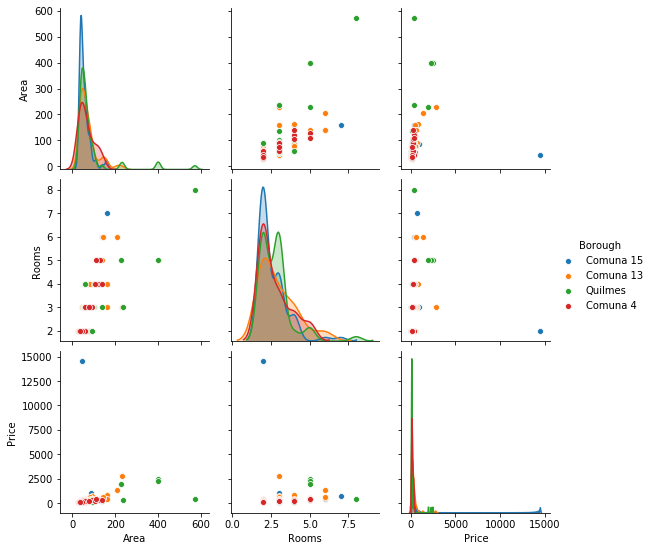

In [93]:
sns.pairplot(apts_ml_df, hue='Borough')

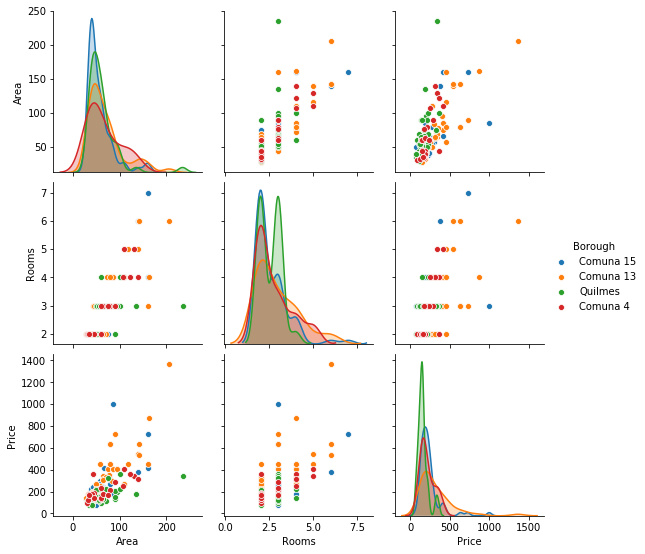

In [94]:
# logial rental price
price_limit = 1500
area_limit = 300
apts_df = apts_ml_df[(apts_ml_df['Price'] <= price_limit) & (apts_ml_df['Area'] <= area_limit)]
sns.pairplot(apts_df, hue='Borough')

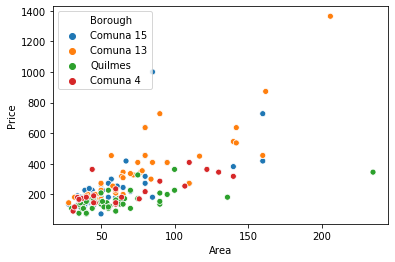

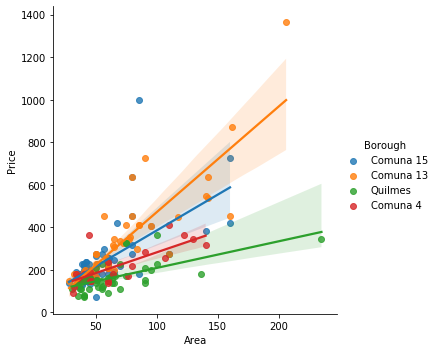

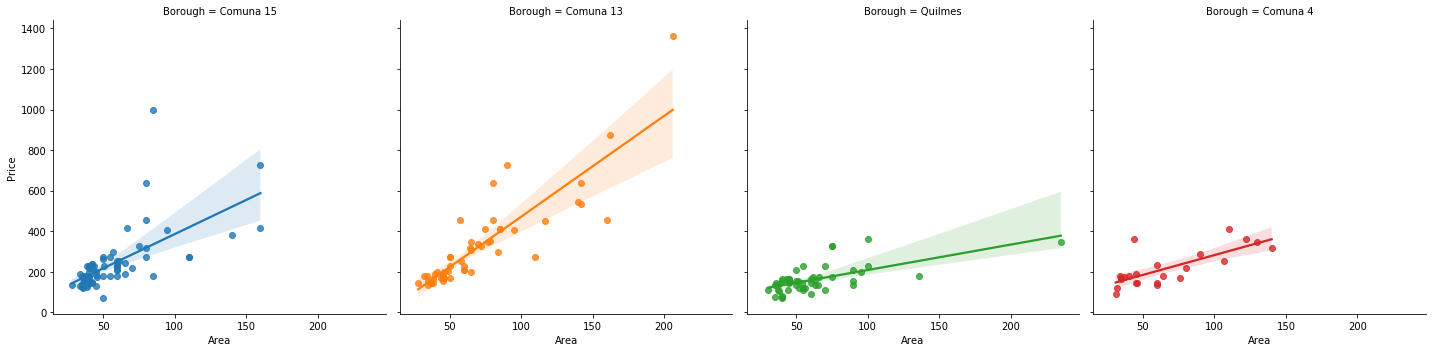

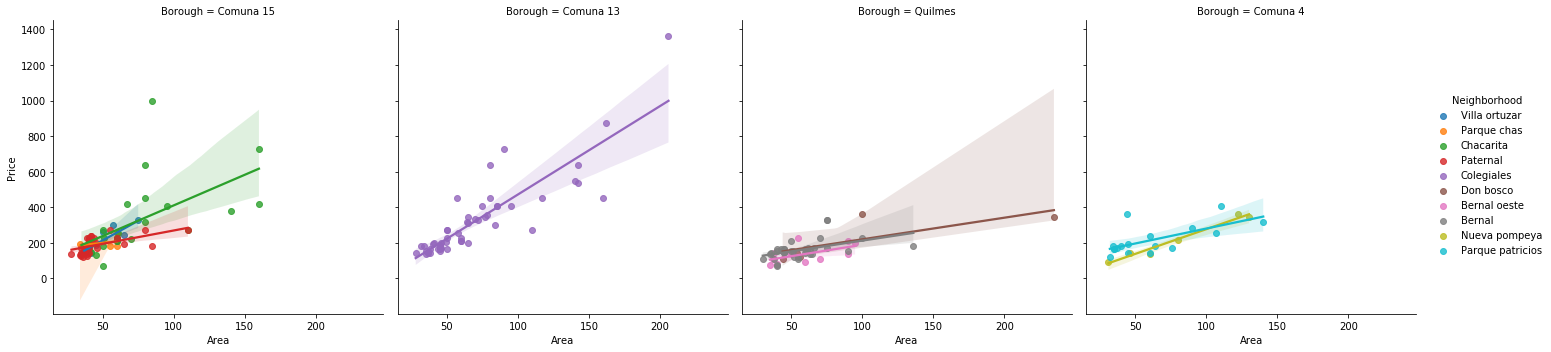

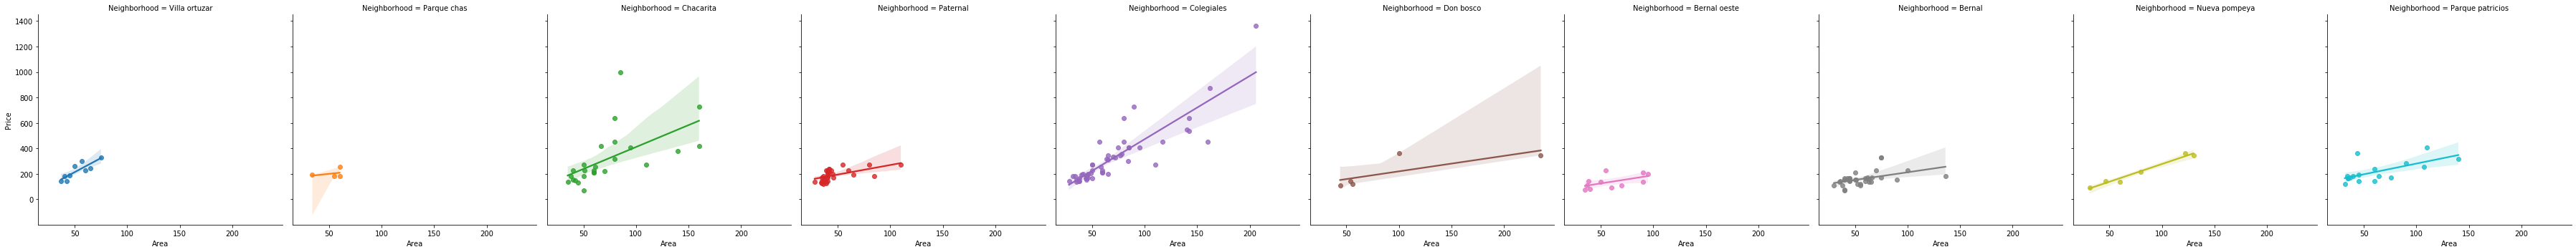

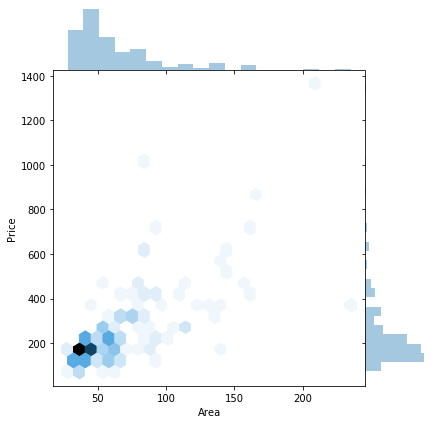

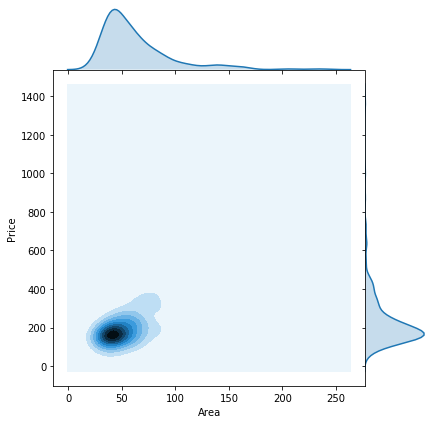

In [95]:
g0 = sns.scatterplot(x='Area', y='Price', hue='Borough', data = apts_df)
g1 = sns.lmplot(x='Area', y='Price', hue='Borough', data = apts_df)
g2 = sns.lmplot(x='Area', y='Price', hue='Borough', col='Borough', data = apts_df)
g2_2 = sns.lmplot(x='Area', y='Price', hue='Neighborhood', col='Borough', data = apts_df)
g2_2 = sns.lmplot(x='Area', y='Price', hue='Neighborhood', col='Neighborhood', data = apts_df)
g3 = sns.jointplot(x='Area', y='Price', data = apts_df, kind="hex", space=0)
g4 = sns.jointplot(x='Area', y='Price', data = apts_df, kind="kde", space=0)

In [96]:
apts_df['Neighborhood'].value_counts()

Colegiales          53
Bernal              34
Paternal            30
Chacarita           25
Parque patricios    17
Bernal oeste        11
Villa ortuzar        9
Nueva pompeya        6
Don bosco            5
Parque chas          4
Name: Neighborhood, dtype: int64

[Text(0.5, 0, '')]

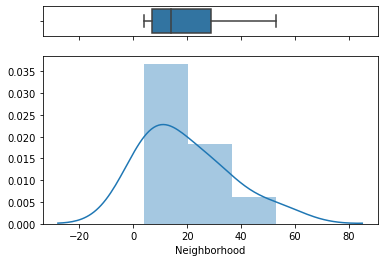

In [97]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x=apts_df['Neighborhood'].value_counts(), ax=ax_box)
sns.distplot(apts_df['Neighborhood'].value_counts(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

### Regresion

In [119]:
# apartment size example
eg_apt_size = 70

In [121]:
regr = linear_model.LinearRegression()

coef = []
intercept = []
MAE = []
MSE = []
R2 = []
eg_apt_cost = []

for index, hood in top10.iterrows():
    temp_df = apts_df[(apts_df['Borough'] == hood['Borough']) & (apts_df['Neighborhood'] == hood['Neighborhood'])]
    
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(temp_df[['Area']]), np.asarray(temp_df[['Price']]), test_size=0.2)
    
    regr.fit(X_train, y_train)
    y_test_hat = regr.predict(X_test)
    
    # Coefficients
    coef.append(regr.coef_[0][0])
    intercept.append(regr.intercept_[0])
    
    # Errors
    MAE.append(np.mean(np.absolute(y_test_hat - y_test)))
    MSE.append(np.mean((y_test_hat - y_test) ** 2))
    R2.append(r2_score(y_test, y_test_hat))
    
    # example
    eg_apt_cost.append(regr.intercept_[0] + regr.coef_[0][0] * eg_apt_size)
    
reg_df = pd.DataFrame(list(zip(coef, intercept, MAE, MSE, R2, eg_apt_cost)), 
               columns =['Coef', 'Intercept', 'MAE', 'MSE', 'R2', 'eg_apt_cost'])
reg_df

C:\Users\leo_h\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leo_h\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Coef,Intercept,MAE,MSE,R2,eg_apt_cost
0,4.384840,-10.020315,32.862176,1544.432938,0.589846,296.918487
1,7.272727,-218.181818,161.818182,26185.123967,NaN,290.909091
2,3.288111,61.809394,113.003195,24039.899736,0.229828,291.977138
3,1.528002,116.593397,31.445819,1350.101779,-0.042161,223.553571
4,5.579716,-50.464650,89.580032,20070.373552,0.554627,340.115487
5,1.115563,120.149382,59.893644,3587.248642,NaN,198.238801
6,1.343417,64.180243,30.282131,1197.417114,0.523222,158.219438
7,1.256309,91.131205,13.949052,305.348780,-0.924743,179.072851
8,3.092185,-24.229806,29.871760,898.216756,0.910178,192.223127
9,1.933031,103.941603,37.507432,2250.640342,0.490977,239.253787


## Conclusion

In [124]:
top10['eg_apt_cost'] = reg_df['eg_apt_cost']

C:\Users\leo_h\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


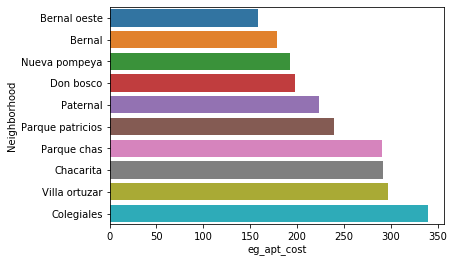

In [128]:
sns.barplot(y='Neighborhood', x='eg_apt_cost', data=top10.sort_values('eg_apt_cost'),
            label="70m2 apt cost")

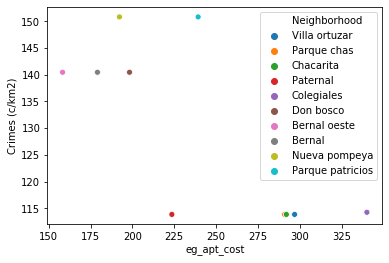

In [131]:
sns.scatterplot(x='eg_apt_cost', y='Crimes (c/km2)', hue='Neighborhood', data = top10)